# Heat advection-diffusion
    -Author: Niccolò Tubini and Riccardo Rigon
    -License: Creative Commons 4.0   
_____   

## Table of Contents

* [Expectations](#Expectations)
* [Meta data](#Meta_data)
* [Reference](#Reference)
* [Visualize the output](#Visualize-the-output)


## Expectations
Here we present a simulation of the heat advection-diffusion in soil.


## Meta data

| Data  | Value  |
|:---|:---|
| Model name| WHETGEO-1D |
| Model version  |  v0.98 |
| Model reference | Tubini and Rigon (2021) |
| Grid input file | `data/Grid_NetCDF/grid_heat_advection_diffusion.nc` |
| Surface boundary condition file, air temperature | `data/Timeseries/airT_T0135.csv` |
| Surface boundary condition file, precipitation | `data/Timeseries/Precip_T0135.csv` |
| Bottom boundary condition file, temperature | `data/Timeseries/bottomT_T0135.csv` |
| .sim file | `simulation/HeatAdvectionDiffusion1D.sim` |
			
## Reference
Casulli, V. and Zanolli, P.: High resolution methods for multidimensional advection–diffusion problems in free-surface hydrodynamics,
Ocean Modelling, 10, 137–151, 2005.


In [1]:
import os
import pandas as pd
import numpy as np
# import datetime as datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
%matplotlib inline

import math
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

plt.rcParams.update(nice_fonts)

linewidth_n = 0.8
linewidth_a = 0.9
my_cmap_T = matplotlib.colors.LinearSegmentedColormap.from_list("",['#053061', '#2166ac', '#4393c3', '#92c5de', '#f7f7f7',  '#f4a582', '#d6604d', '#b2182b', '#67001f'])
my_cmap_psi = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
project_path = os.path.dirname(os.getcwd())

C:\Users\Niccolo\Anaconda3\envs\geoframe_vicenza\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# Visualize output

## Without considering the phase change of water

In [2]:
os.chdir(project_path+'/output')

In [3]:
ds = xr.open_dataset("Sim_heat_advection_diffusion_0000.nc")

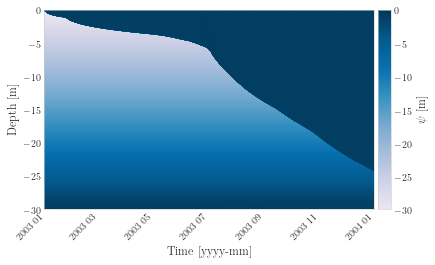

In [5]:
plot_width = 15/2.54

fig, ax = plt.subplots(1, 1, figsize=(plot_width, plot_width/1.618)) 

norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))
im = ds.psi.plot(ax=ax, y='depth', cmap=my_cmap_psi, norm=norm, add_colorbar=False)
cbaxes = fig.add_axes([0.91, 0.122, 0.03, 0.76]) 
cbar = fig.colorbar(im, ax=ax, orientation="vertical", fraction=0.07, pad=0.1, cax=cbaxes, label='$\psi$ [m]', ticks=[0,-5,-10,-15,-20,-25,-30])


ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [yyyy-mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %m'))
ax.xaxis.set_tick_params(rotation=45)

plt.show()

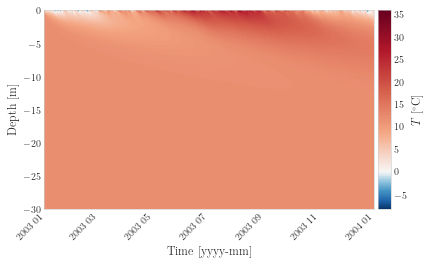

In [6]:
plot_width = 15/2.54

fig, ax = plt.subplots(1, 1, figsize=(plot_width, plot_width/1.618)) 

norm = matplotlib.colors.DivergingNorm(vmin=np.amin(ds.T.values)-273.15, vcenter=0, vmax=np.amax(ds.T.values)-273.15)
im = (ds.T-273.15).plot(ax=ax, y='depth', cmap=my_cmap_T, norm=norm, add_colorbar=False)
cbaxes = fig.add_axes([0.91, 0.122, 0.03, 0.76]) 
cbar = fig.colorbar(im, ax=ax, orientation="vertical", fraction=0.07, pad=0.1, cax=cbaxes, label='$T$ [$^\circ$C]')#, ticks=[0,-5,-10,-15,-20,-25,-30])


ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [yyyy-mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %m'))
ax.xaxis.set_tick_params(rotation=45)

plt.show()